In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)
num_examples = 250
x_1 = np.random.uniform(-10, 10, num_examples)
x_2 = np.random.uniform(-10, 10, num_examples)

labels = np.where(x_1**2 + x_2**2 < 25, 1, 0)

X_train = np.column_stack((x_1, x_2))
y_train = labels.reshape(1, -1)

X_train.T[:5], y_train.T[:5]

(array([[-2.50919762,  9.01428613,  4.63987884,  1.97316968, -6.87962719,
         -6.88010959, -8.83832776,  7.32352292,  2.02230023,  4.16145156,
         -9.58831011,  9.39819704,  6.64885282, -5.75321779, -6.36350066,
         -6.3319098 , -3.91515514,  0.49512863, -1.36109963, -4.1754172 ,
          2.23705789, -7.21012279, -4.15710703, -2.67276313, -0.87860032,
          5.70351923, -6.00652436,  0.28468877,  1.84829138, -9.07099175,
          2.15089704, -6.58951753, -8.69896814,  8.97771075,  9.31264066,
          6.16794696, -3.90772462, -8.04655772,  3.68466053, -1.19695013,
         -7.5592353 , -0.0964618 , -9.31222958,  8.18640804, -4.82440037,
          3.25044569, -3.76577848,  0.40136042,  0.93420559, -6.30291089,
          9.39169256,  5.50265647,  8.78997883,  7.89654701,  1.95799958,
          8.4374847 , -8.23014996, -6.08034275, -9.09545422, -3.49339338,
         -2.22645421, -4.57301936,  6.57475018, -2.86493347, -4.38130981,
          0.85392166, -7.1815155 ,  6.

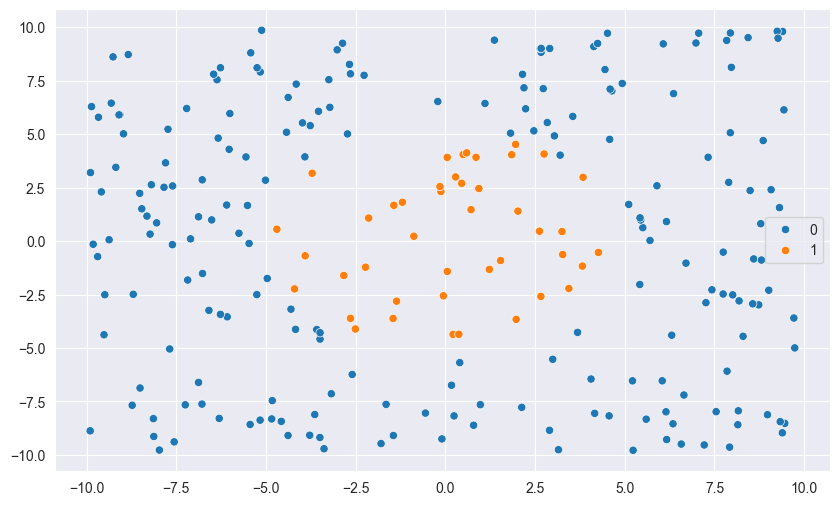

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_1, y=x_2, hue=labels)
plt.show()

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [30]:
def initialize_params(input_size):
    W = np.random.randn(input_size, 1)
    b = 0
    return W, b

In [38]:
def propagation(w, b, X, y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X**2) + b)
    epsilon = 1e-8
    cost = -1/m * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
    dw = 1/m * np.dot(X, (A - y).T)
    db = 1/m * np.sum(A - y)
    return dw, db, cost

In [39]:
def optimize(w, b, X, y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, X, y)
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
            print(f'Cost after iteration {i}: {cost}')
    return w, b, costs

In [40]:
def predict(w, b, X):
    m = X.shape[1]
    y_pred = np.zeros((1, m))
    A = sigmoid(np.dot(w.T, X**2) + b)
    y_pred = np.where(A > 0.5, 1, 0)
    return y_pred

In [41]:
def model(X_train, y_train, num_iterations, learning_rate):
    input_size = X_train.shape[0]
    w, b = initialize_params(input_size)
    w, b, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate)
    return w, b, costs

In [42]:
w, b, costs = model(X_train.T, y_train, 3000, 0.001)

Cost after iteration 0: 7.409789474198972
Cost after iteration 100: 7.376107736138072
Cost after iteration 200: 7.338941197546583
Cost after iteration 300: 7.296643604884125
Cost after iteration 400: 7.249572678796999
Cost after iteration 500: 7.199151983411161
Cost after iteration 600: 7.146540989718919
Cost after iteration 700: 7.0925522479451955
Cost after iteration 800: 7.038425375391922
Cost after iteration 900: 6.986281068977802
Cost after iteration 1000: 6.938809038232284
Cost after iteration 1100: 6.8974757598119485
Cost after iteration 1200: 6.860746272347205
Cost after iteration 1300: 6.826207581525001
Cost after iteration 1400: 6.792385614991021
Cost after iteration 1500: 6.758823750751293
Cost after iteration 1600: 6.725558258107234
Cost after iteration 1700: 6.691997251383342
Cost after iteration 1800: 6.656268548841796
Cost after iteration 1900: 6.615677734978545
Cost after iteration 2000: 6.568078444803452
Cost after iteration 2100: 6.513066293178572
Cost after iteration

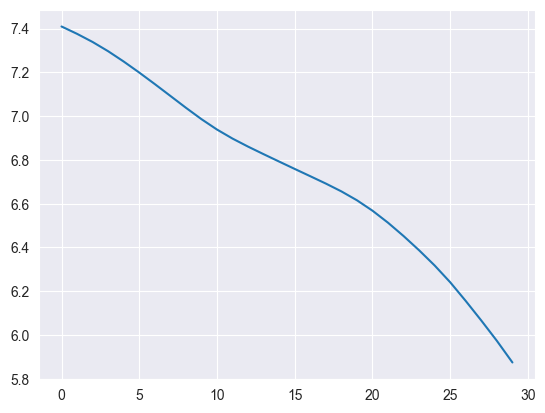

In [43]:
plt.plot(costs)

In [57]:
def plot_decision_boundary(w, b, X, y):
    x1 = (np.linspace(-10, 10, 100))**(1/2)
    x2 = (-(w[0] * x1**2 + b) / w[1])**(1/2)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[0], y=X[1], hue=y[0])
    plt.plot(x1, x2, color='red')
    plt.show()

C:\Users\KATANA\AppData\Local\Temp\ipykernel_18724\3679062188.py:2: RuntimeWarning: invalid value encountered in sqrt
  x1 = (np.linspace(-10, 10, 100))**(1/2)


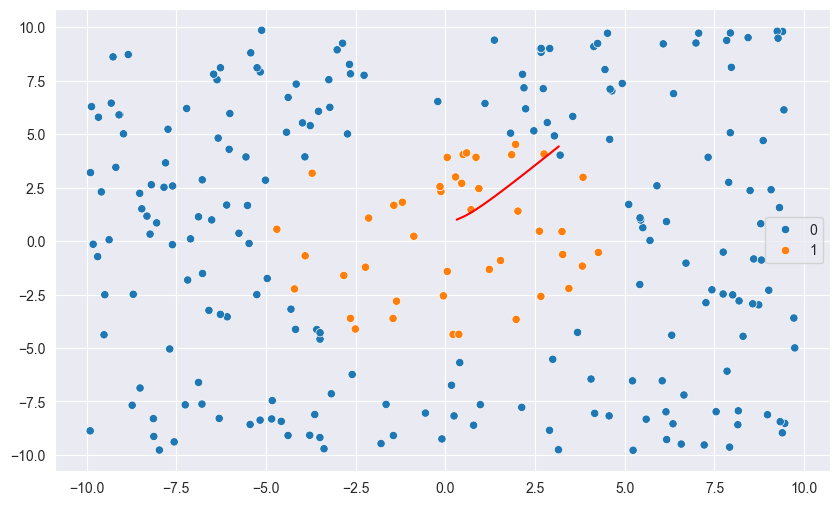

In [58]:
plot_decision_boundary(w, b, X_train.T, y_train)

In [46]:
y_pred = predict(w, b, X_train.T)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_train[0], y_pred[0])

0.616

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train, y_train[0])

LogisticRegression()

In [21]:
y_pred = lr.predict(X_train)

In [22]:
accuracy_score(y_train[0], y_pred)

0.828

In [23]:
lr.coef_, lr.intercept_

(array([[0.01462272, 0.00469211]]), array([-1.5721393]))

In [24]:
plot_decision_boundary(lr.coef_[0], lr.intercept_, X_train, y_train)

ValueError: All arrays must be of the same length

<Figure size 1000x600 with 0 Axes>